# Assignment 14

1. Lakukan image classification terhadap dataset fashion MNIST (https://keras.io/api/datasets/fashion_mnist/) dengan 2 arsitektur diatas! Tunjukan grafik epoch terhadap loss. Tentukan arsitektur dengan hasil terbaik dan jelaskan!

2. Buatlah sebuah arsitektur dengan convolution layer lebih dalam:

  - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
  - Max Pooling Layer 2x2
  - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
  - Max Pooling Layer 2x2

  Lakukan training kepada dataset MNIST & Fashion MNIST! Perhatikan hasil accuracy yang didapat & jelaskan!

In [ ]:
# library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adamax

# Jawaban no. 1

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

Train (60000, 28, 28) (60000,)
Label (10000, 28, 28) (10000,)


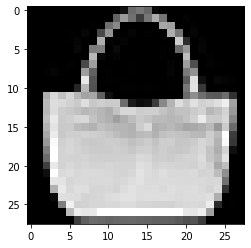

In [ ]:
(feature_train_fm, label_train_fm), (feature_test_fm, label_test_fm) = fashion_mnist.load_data()

print('Train', feature_train_fm.shape, label_train_fm.shape)
print('Label', feature_test_fm.shape, label_test_fm.shape)

plt.imshow(feature_train_fm[100], cmap=plt.get_cmap('gray'))

## Feature Engineering fashion_mnist

In [ ]:
# mengubah bentuk dimensi dari feature menjadi 1 kolom
feature_train_fm = feature_train_fm.reshape((feature_train_fm.shape[0], 28, 28, 1))
feature_test_fm = feature_test_fm.reshape((feature_test_fm.shape[0], 28, 28, 1))

In [ ]:
print(feature_train_fm.shape)

(60000, 28, 28, 1)


In [ ]:
# mengubah data label menjadi kategori
from tensorflow.keras.utils import to_categorical

label_train_fm = to_categorical(label_train_fm)
label_test_fm = to_categorical(label_test_fm)

print(label_train_fm)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
feature_train_fm = feature_train_fm.astype('float32')
feature_test_fm = feature_test_fm.astype('float32')

feature_train_fm = feature_train_fm / 255.0
feature_test_fm = feature_test_fm / 255.0

## Neural Network


In [ ]:
nn_model = Sequential()

nn_model.add(Flatten(input_shape=(28, 28, 1)))
nn_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(Dense(10, activation='softmax'))

opt = SGD()

nn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

nn_model.summary()

history_nn1 = nn_model.fit(feature_train_fm, label_train_fm, batch_size=32, 
                       validation_data=(feature_test_fm, label_test_fm), epochs=10)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7374 - accuracy: 0.7621 - val_loss: 0.5673 - val_accuracy: 0.8060
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5105 - accuracy: 0.8264 - val_loss: 0.5099 - val_accuracy: 0.8222
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4652 - accu

In [ ]:
loss, accuracy = nn_model.evaluate(feature_test_fm, label_test_fm, verbose=2)

print('Test accuracy:', accuracy)
print('Test Loss:', loss)

313/313 - 1s - loss: 0.4116 - accuracy: 0.8542
Test accuracy: 0.854200005531311
Test Loss: 0.4116148054599762


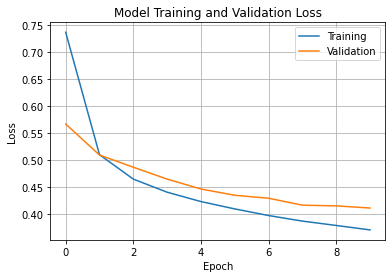

In [ ]:
plt.plot(history_nn1.history['loss'])
plt.plot(history_nn1.history['val_loss'])
plt.title('Model Training and Validation Loss')
# plt.ylim([0, 10])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid('True')
plt.show()

## CNN

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(Dense(10, activation='softmax'))

opt = SGD()

cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history_cnn1 = cnn_model.fit(feature_train_fm, label_train_fm, batch_size=32, 
                        validation_data=(feature_test_fm, label_test_fm), 
                        epochs=10)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5384 - accuracy: 0.8109 - val_loss:

In [ ]:
loss, accuracy = cnn_model.evaluate(feature_test_fm, label_test_fm, verbose=2)

print('Test accuracy:', accuracy)
print('Test Loss:', loss)

313/313 - 1s - loss: 0.2847 - accuracy: 0.8938
Test accuracy: 0.8938000202178955
Test Loss: 0.28473830223083496


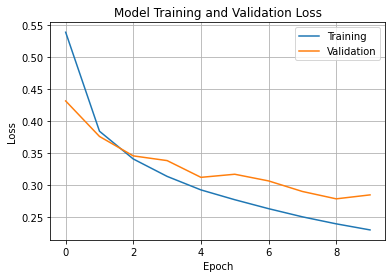

In [ ]:
plt.plot(history_cnn1.history['loss'])
plt.plot(history_cnn1.history['val_loss'])
plt.title('Model Training and Validation Loss')
# plt.ylim([0, 10])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid('True')
plt.show()

## Kesimpulan:
- Dengan Parameter yang digunakan sama yaitu epoch=10, optimizer=SGD(),Arsitektur terbaik pada kasus ini yaitu Convolutional Neural Network(CNN) dengan accuracy pada data test = 0.89 dan loss = 0.28 sedangkan pada arsitektur Neural Network (NN) accuracy data test = 0.85 dan loss = 0.41
- Hasil arsitektur CNN lebih baik karena analisisnya lebih dalam dengan beberapa layer dan perseptron yang lebih banyak dibandingkan NN dan parameter yang digunakan juga lebih cocok ke CNN namun jika parameter yang digunakan berbeda kemungkinan hasil accuracynya pun akan berubah (exp: epoch dan optimizer diganti dengan nilai parameter yang lain).

# Jawaban No. 2:

## MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


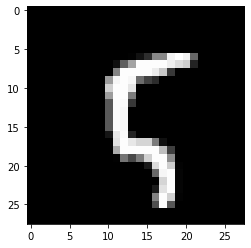

In [ ]:
(feature_train_mn, label_train_mn), (feature_test_mn, label_test_mn) = mnist.load_data()

print('Train:', feature_train_mn.shape, label_train_mn.shape)
print('Test:', feature_test_mn.shape, label_test_mn.shape)

plt.imshow(feature_train_mn[100], cmap=plt.get_cmap('gray'))

## Feature Engineering mnist

In [ ]:
# mengubah bentuk dimensi dari feature menjadi 1 kolom
feature_train_mn = feature_train_mn.reshape((feature_train_mn.shape[0], 28, 28, 1))
feature_test_mn = feature_test_mn.reshape((feature_test_mn.shape[0], 28, 28, 1))

In [ ]:
print(feature_train_mn.shape)

(60000, 28, 28, 1)


In [ ]:
# mengubah data label menjadi kategori
from tensorflow.keras.utils import to_categorical

label_train_mn = to_categorical(label_train_mn)
label_test_mn = to_categorical(label_test_mn)

print(label_train_mn)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
feature_train_mn = feature_train_mn.astype('float32')
feature_test_mn = feature_test_mn.astype('float32')

feature_train_mn = feature_train_mn / 255.0
feature_test_mn = feature_test_mn / 255.0

## Arsitektur CNN

In [ ]:
cnn_model2 = Sequential()

cnn_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(28, 28, 1)))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(28, 28, 1)))
cnn_model2.add(MaxPooling2D((2, 2)))

cnn_model2.add(Flatten())
cnn_model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
cnn_model2.add(Dense(10, activation='softmax'))

opt = SGD()

cnn_model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## CNN DEEP MNIST

In [ ]:
cnn_model2.summary()

history_cnn2_mn = cnn_model2.fit(feature_train_mn, label_train_mn, batch_size=32, 
                        validation_data=(feature_test_mn, label_test_mn), 
                        epochs=20)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_59 (Dense)             (None, 10)              

In [ ]:
loss, accuracy = cnn_model2.evaluate(feature_test_mn, label_test_mn, verbose=2)
print('Test accuracy:', accuracy)
print('Test Loss:', loss)

313/313 - 1s - loss: 0.0308 - accuracy: 0.9903
Test accuracy: 0.9902999997138977
Test Loss: 0.03081023506820202


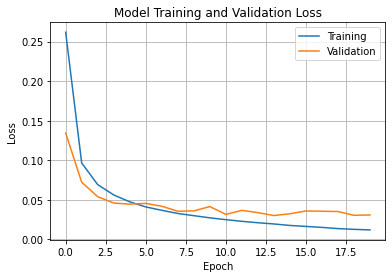

In [ ]:
plt.plot(history_cnn2_mn.history['loss'])
plt.plot(history_cnn2_mn.history['val_loss'])
plt.title('Model Training and Validation Loss')
# plt.ylim([0, 10])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid('True')
plt.show()

## CNN DEEP FASHION MNIST

In [ ]:
cnn_model2.summary()

history_cnn2_fm = cnn_model2.fit(feature_train_fm, label_train_fm, batch_size=32, 
                        validation_data=(feature_test_fm, label_test_fm), 
                        epochs=20)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_59 (Dense)             (None, 10)              

In [ ]:
loss, accuracy = cnn_model2.evaluate(feature_test_fm, label_test_fm, verbose=2)
print('Test accuracy:', accuracy)
print('Test Loss:', loss)

313/313 - 1s - loss: 0.2834 - accuracy: 0.9000
Test accuracy: 0.8999999761581421
Test Loss: 0.2834113538265228


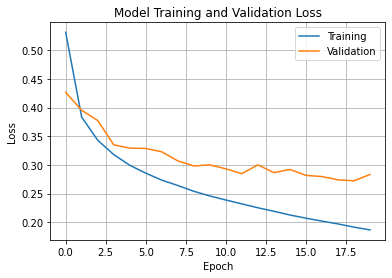

In [ ]:
plt.plot(history_cnn2_fm.history['loss'])
plt.plot(history_cnn2_fm.history['val_loss'])
plt.title('Model Training and Validation Loss')
# plt.ylim([0, 10])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid('True')
plt.show()

### Kesimpulan:
- Dengan menambah dalam layer dan perseptron pada model cnn, nilai accuracy pun meningkat atau semakin bagus.
- Pada data mnist pada cnn sederhana accuracy = 0.989, loss = 0.039, setelah layer ditambah/diperdalam accuracy = 0.990 dan loss = 0.030 begitu juga pada data fashion mnist accuracy = 0.893 --> 0.899 dan loss = 0.284 ---> 0.283 (dari data test/validation)
- Perbedaan setelah memperdalam layers tidak begitu signifikan karena tidak melakukan perubahan pada parameter hanya pada jumlah epoch saya yang semula 10 menjadi 20.
- Accuracy masih dapat ditingkatkan dan loss diperkecil dengan mengatur beberapa parameter atau dapat juga menambah layer dengan jumlah perseptron yang berbeda maupun model layer yang berbeda seperti dropout() untuk mengurangi overfitting.